# simple linear regression


1 esc + y - conert cell to code 

2 esc+m - convert to markdown

3 shift+enter - execute code

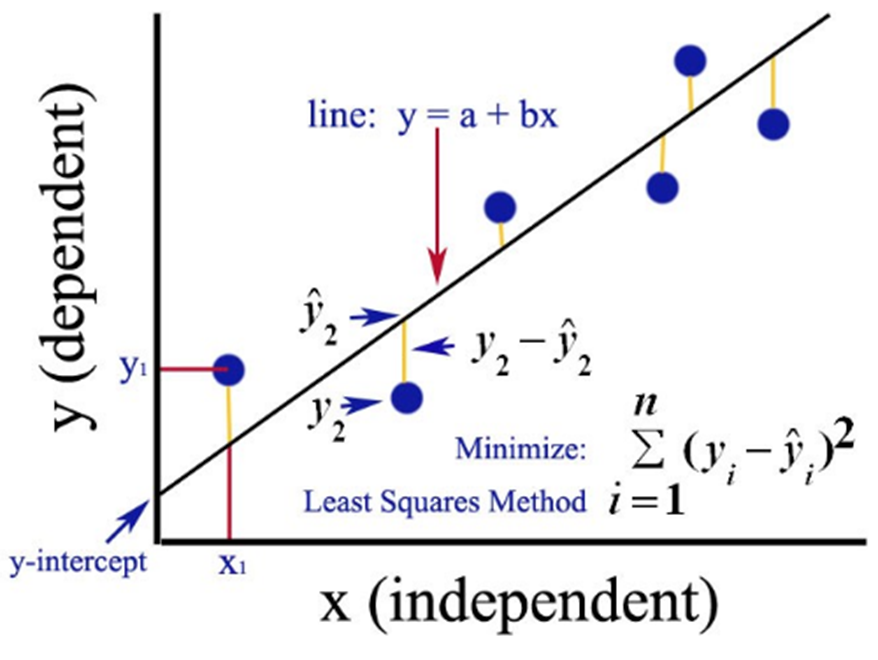

from warnings import filterwarnings

In [4]:
# ignore non harmful warnings
from warnings import filterwarnings 

In [3]:
filterwarnings("ignore")

# Step 1 : Data Ingestion

In [4]:
import pandas as pd 

In [5]:
df = pd.read_csv("50_Startups.csv")

In [6]:
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Problem statement - 
Estimate profit for startups 

For student who are unable to see suggestion
Command Pallete -> Ctrl + Shift + P
Search Python: Restart Language Server

In [1]:
# Step 2 - Perform basic data quality checks

In [7]:
df.shape

(50, 5)

In [9]:
#missing values
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [12]:
# check for duplicates
df.duplicated().sum()

np.int64(0)

In [15]:
#drop duplicates
df = df.drop_duplicates(keep="first").reset_index(drop=True)

In [16]:
df

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [17]:
df.shape

(50, 5)

# Step 3 EDA - exploratory data analysis

In [19]:
import seaborn as sns

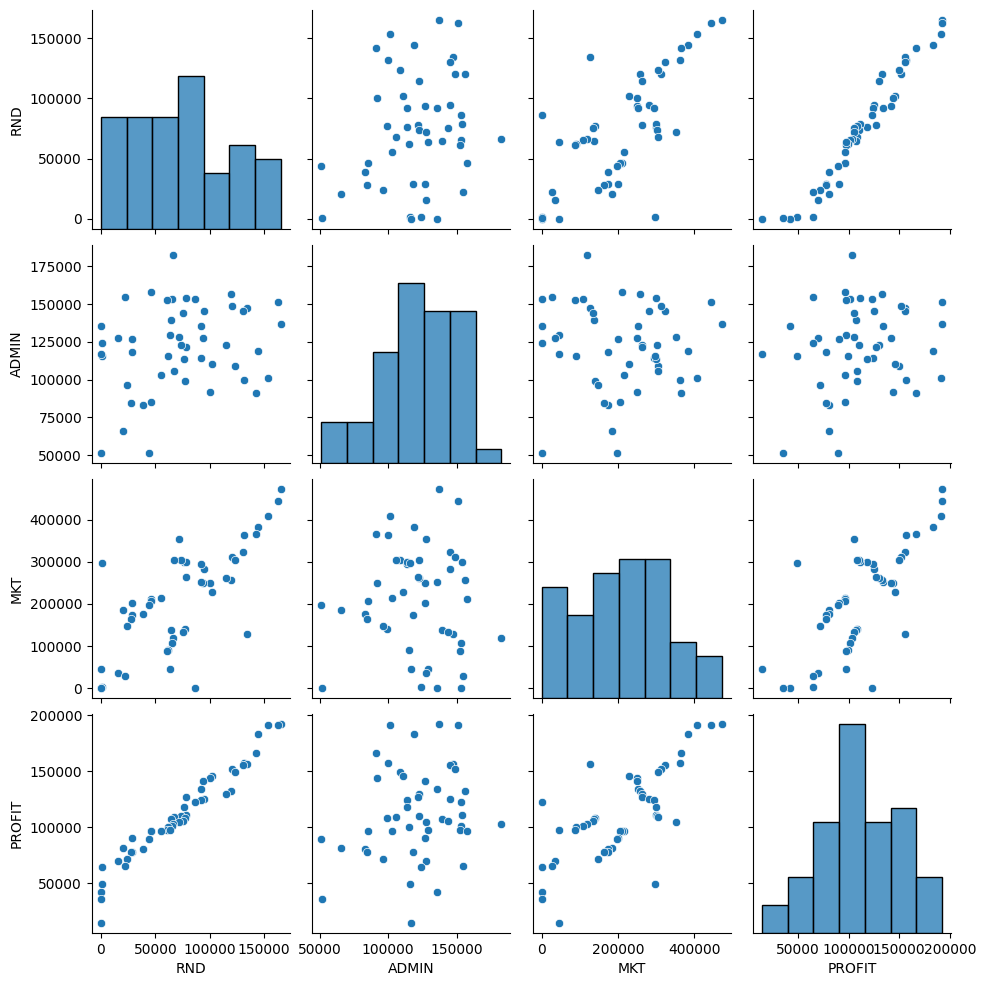

In [20]:
sns.pairplot(data=df)

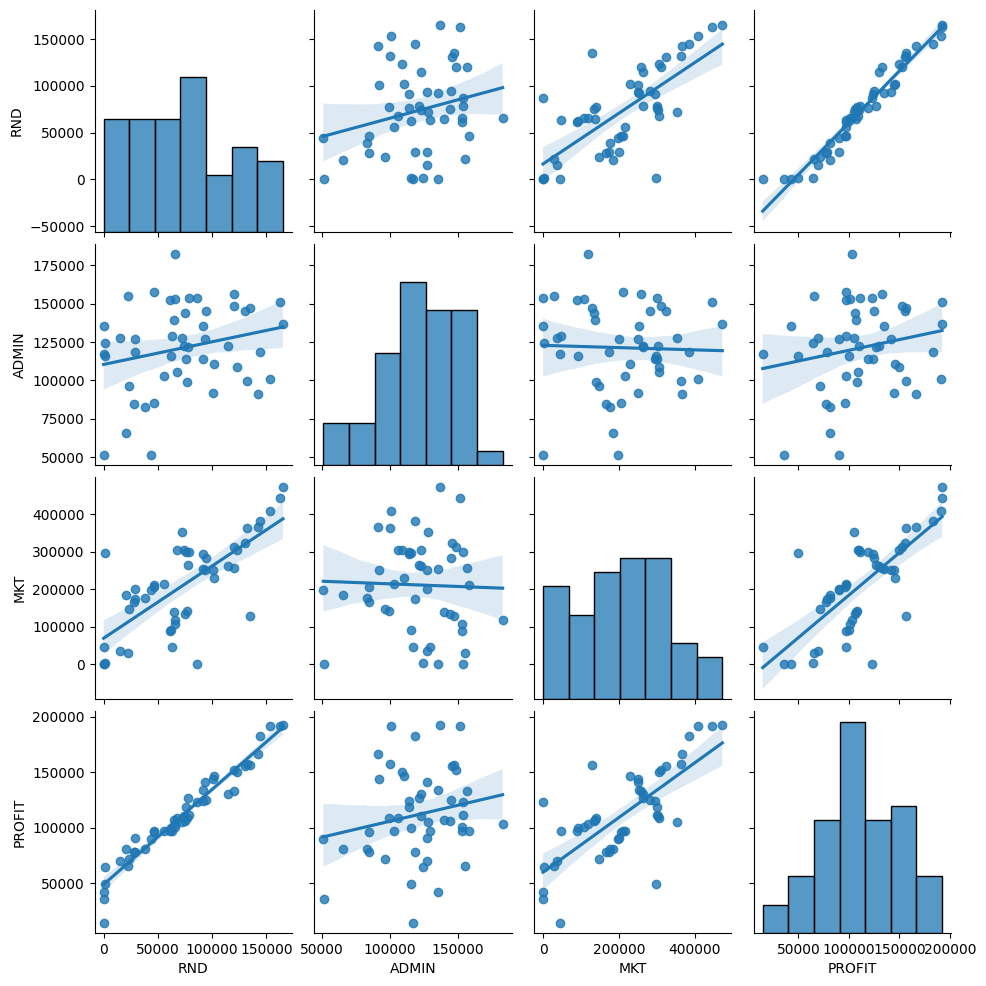

In [21]:
sns.pairplot(data=df, kind= 'reg')

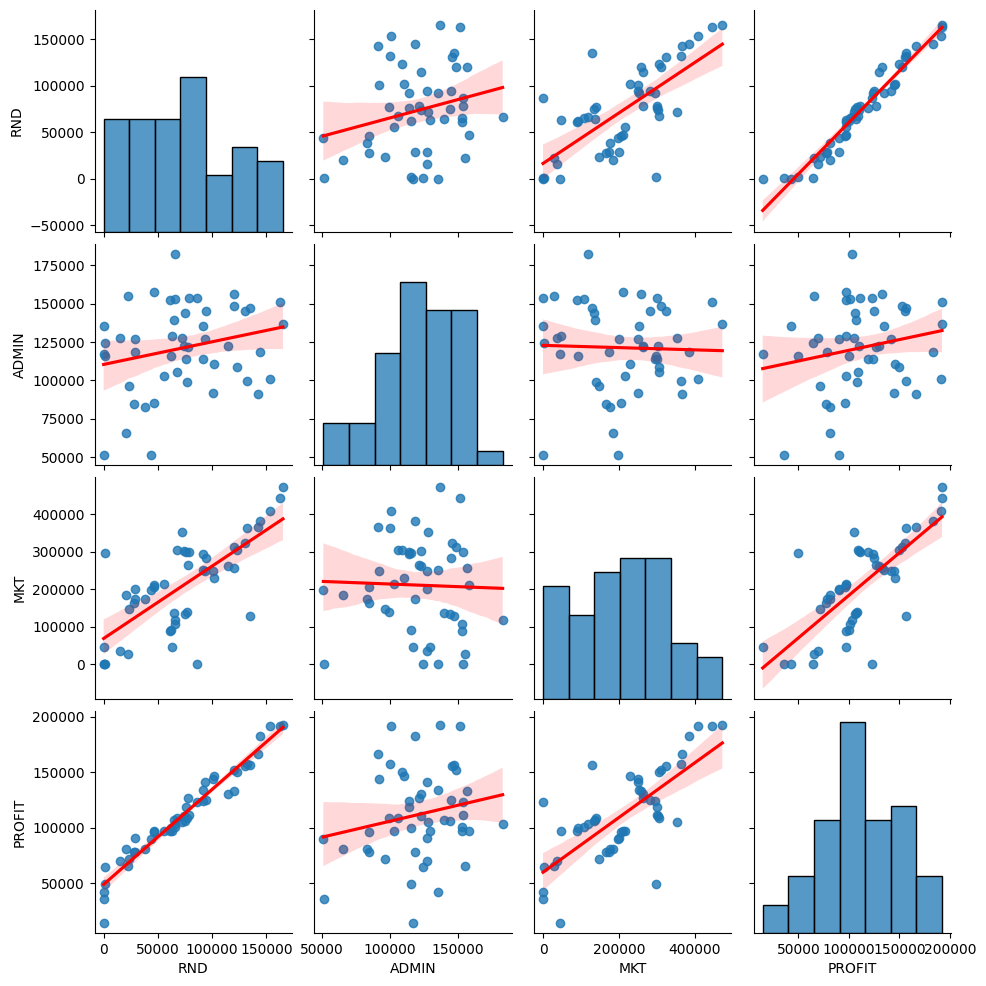

In [23]:
sns.pairplot(data=df, kind= "reg" ,plot_kws ={"line_kws": {"color":"red" }})

In [24]:
corr = df.corr(numeric_only=True)
corr

,RND,ADMIN,MKT,PROFIT
RND,1.000000,0.241955,0.724248,0.972900
ADMIN,0.241955,1.000000,-0.032154,0.200717
MKT,0.724248,-0.032154,1.000000,0.747766
PROFIT,0.972900,0.200717,0.747766,1.000000


<Axes: >

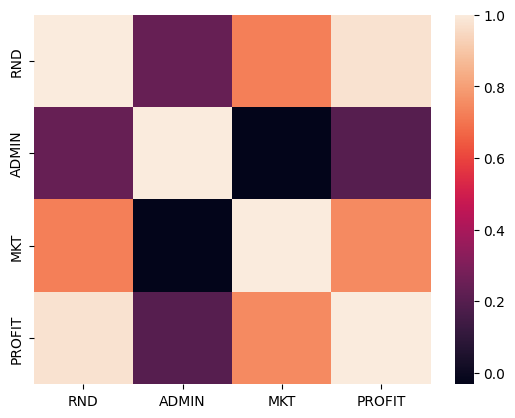

In [25]:
sns.heatmap(data=corr)

<Axes: >

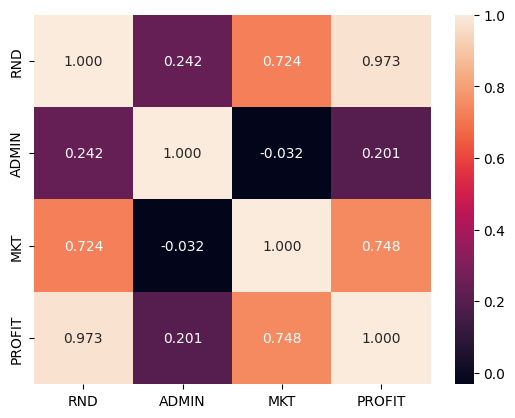

In [30]:
sns.heatmap(data=corr, annot=True, fmt=".3f")

# Simple linear Regression (1 Target feature and 1 Predictor)
1. Profit (Target) ~ RND (Predictor)
2. Profit_pred = B0 + B1*RND
3. B0 - intercept
4. B1 - Coefficient (Slope)

# seperate X and Y

In [42]:
X = df[["RND"]]
Y = df["PROFIT"]

In [43]:
X.head()

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [37]:
Y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: PROFIT, dtype: float64

In [44]:
from sklearn.linear_model import LinearRegression

In [46]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X, Y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [47]:
model1.intercept_

np.float64(49032.89914125215)

In [49]:
model1.coef_

array([0.85429137])

In [50]:
# Profit Predicted